### Import Libraries

In [1]:
!pip install JasonUtils

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_is_fitted
from JasonUtils.Results import results
from sklearn.utils import check_X_y

In [3]:
def plot3dProb(X, est, title='',):
    plt.close('all')
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.zaxis.set_tick_params(labelsize=10)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    for index in [0, 1, 2]:
        zz = Z[:, index].reshape(xx.shape)
        ax.plot_surface(xx, yy, zz, label=f'Class {index}', alpha=0.3)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

In [4]:
def plotDecisionBoundary(X, y, est, title='' ,risk = True ):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if risk :
      Z ,t= est.predict(np.c_[xx.ravel(), yy.ravel()])
    else :
      Z = est.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)
    plt.show()

In [5]:
def label_transform(labels):
  txt_labels = []
  for label in labels:
    if label == 0:
      txt_labels.append('Iris-Setosa')
    elif label == 1:
      txt_labels.append('Iris-Versicolour')
    elif label == 2:
      txt_labels.append('Iris-Virginica')
  return txt_labels

### (1,2) Load the Iris dataset and Drop the petal length and petal width features to form a 2D Iris dataset

In [6]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_new = np.delete(X,[2,3],1)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0)

In [7]:
print(X.shape)
print(X_new.shape)

(150, 4)
(150, 2)


###(3) Apply Naïve Bayes Classifier with default params


 training accuracy :   0.812 


 testing accuracy :   0.763 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      0.75      0.73        16
           2       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38


Confusion Matrix:

[[13  0  0]
 [ 0 12  4]
 [ 0  5  4]]


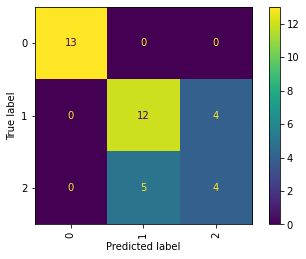

In [8]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
y_predic_train = NB_model.predict(X_train)
y_predic_test = NB_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_predic_train) 
test_accuracy = accuracy_score(y_test, y_predic_test) 
print("\n training accuracy :  "  ,round(train_accuracy,3),"\n")
print("\n testing accuracy :  "  ,round(test_accuracy,3),"\n")
print(classification_report(y_test, y_predic_test))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_predic_test))
plot_confusion_matrix(NB_model, X_test, y_test, xticks_rotation='vertical');

### (4) Apply Naïve Bayes Classifier with hyperparams tunning

In [9]:
def build_NBmodel(smoothing, X_train, X_test, y_train, y_test):
  model = GaussianNB(var_smoothing = smoothing)
  model.fit(X_train,y_train)
  
  y_pred_train = model.predict(X_train)
  train_accuracy = accuracy_score(y_train ,y_pred_train)

  y_pred = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred)

  print("train accuracy :  "  ,round(train_accuracy,3),"\n")
  print("testing accuracy :  "  ,round(test_accuracy,3),"\n")

  return train_accuracy ,test_accuracy


In [10]:
train_scores_list =[]
test_scores_list = []

#### (4.1) with var_smoothing = 1e-9

In [11]:
train_1 ,test_1= build_NBmodel(1e-9, X_train, X_test, y_train, y_test)
train_scores_list.append(train_1)
test_scores_list.append(test_1)

train accuracy :   0.812 

testing accuracy :   0.763 



#### (4.2) with var_smoothing = 1e-8

In [12]:
train_2 ,test_2= build_NBmodel(1e-8, X_train, X_test, y_train, y_test)
train_scores_list.append(train_2)
test_scores_list.append(test_2)

train accuracy :   0.812 

testing accuracy :   0.763 






















####(4.3) with var_smoothing = 1e-7

In [13]:
train_3 ,test_3 = build_NBmodel(1e-7, X_train, X_test, y_train, y_test)
train_scores_list.append(train_3)
test_scores_list.append(test_3)

train accuracy :   0.812 

testing accuracy :   0.763 



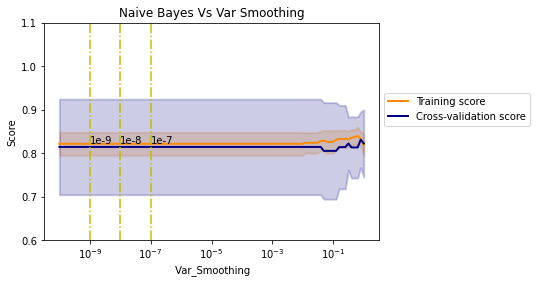

In [22]:
model = GaussianNB()
model.fit(X_train,y_train)
param_range=np.logspace(0,-10, num=100)
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="var_smoothing", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Naive Bayes Vs Var Smoothing")
plt.xlabel(" Var_Smoothing")
plt.ylabel("Score")
plt.ylim(0.6, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="upper left" , bbox_to_anchor=(1, 0.7))

plt.axvline(1e-9  , color = "y" ,linestyle = "-.")
plt.axvline(1e-8  , color = "y" ,linestyle = "-.")
plt.axvline(1e-7  , color = "y" ,linestyle = "-.")

plt.annotate("1e-9" , xy =(1e-9 , train_scores_mean.mean()))
plt.annotate("1e-8" , xy =(1e-8 , train_scores_mean.mean()))
plt.annotate("1e-7" , xy =(1e-7 , train_scores_mean.mean()))
plt.show()


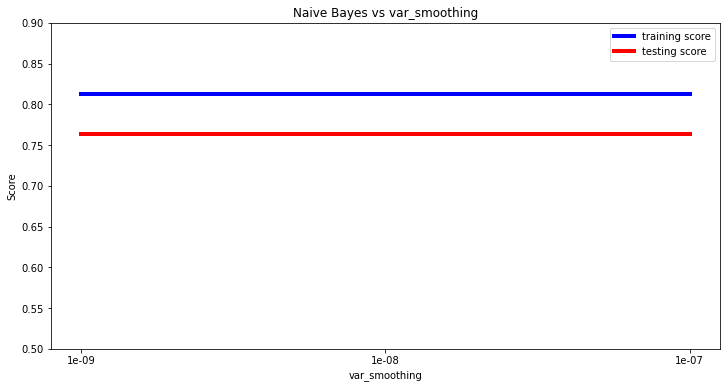

In [23]:
var_smoothing = [1e-9 , 1e-8 , 1e-7]
values = range(len(var_smoothing))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_scores_list, color='blue', label='training score', linewidth=4)
ax.plot(test_scores_list, color='red', label='testing score', linewidth=4)
ax.set_ylim(0.5, 0.9)
plt.xlabel("var_smoothing")
plt.ylabel("Score")
plt.title("Naive Bayes vs var_smoothing")
plt.xticks(values ,var_smoothing)
plt.legend()
plt.show()

### (5) Develop Risk-based Bayesian Decision Theory Classifier (RBDTC)

In [16]:
class BayesianDecisionTheoryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator, utilityMat):
        self.estimator = estimator
        self.utilityMat = utilityMat

    def fit(self, X, y):
      # check_X_y method check for consistent length, X is checked 
      #to be non-empty and check for nan values.
        cleaned_data= check_X_y(X,y)
        self.classes_ = np.unique(cleaned_data[1])
        self.estimator_ = clone(self.estimator).fit(cleaned_data[0],
                                                    cleaned_data[1])
        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        prob = self.estimator_.predict_proba(X)
        probList = [(prob * self.utilityMat[index]).sum(axis=1).reshape((-1, 1))
                    for index, c in enumerate(self.classes_)]
        prob = np.hstack(probList)
        return prob

    def predict(self, X):
        pred = self.predict_proba(X).argmin(axis=1)
        # enable the classifier to predict text format y 
        pred_txt = label_transform(pred)
        return self.classes_[pred], pred_txt

### (6) Apply Risk-based Bayesian Decision Theory Classifier which takes Naïve Bayes Classifier as base estimator

In [17]:
utilityMat = np.array([
        [-10, -5, -5],
        [-5, -10, -5],
        [-5, -5, -100]])
bdtc = BayesianDecisionTheoryClassifier(GaussianNB(), utilityMat)
bdtc.fit(X_train, y_train)
yPred, y_prd_txt = bdtc.predict(X_test)

In [18]:
print(yPred)
print(y_prd_txt)



[2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 1 0 2 2 0 2 2 2 2
 2]
['Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica']


(7) Plot decision boundary and calculate precision, recall and accuracy for training and testing set.

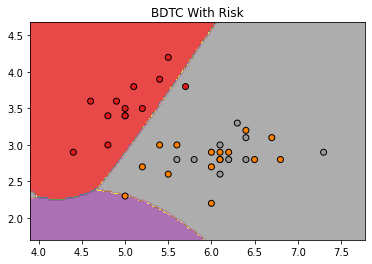

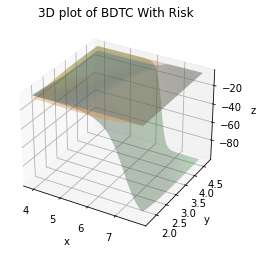

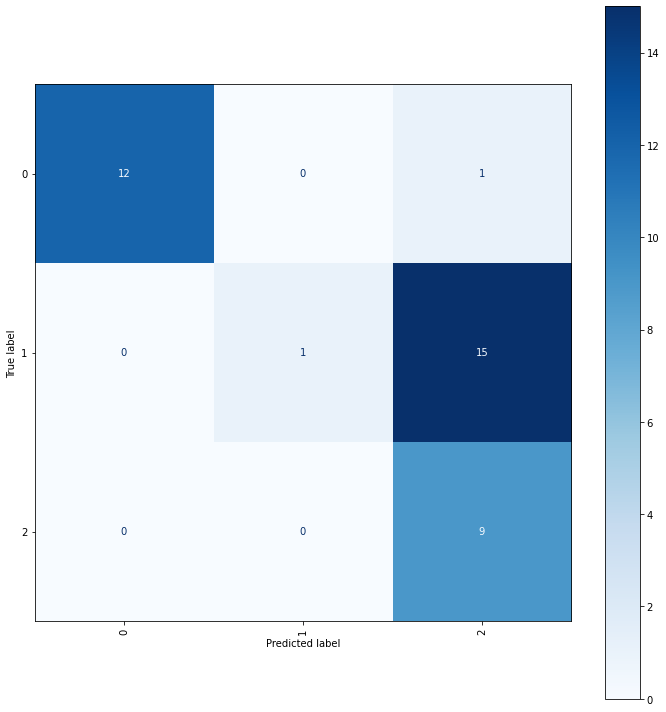

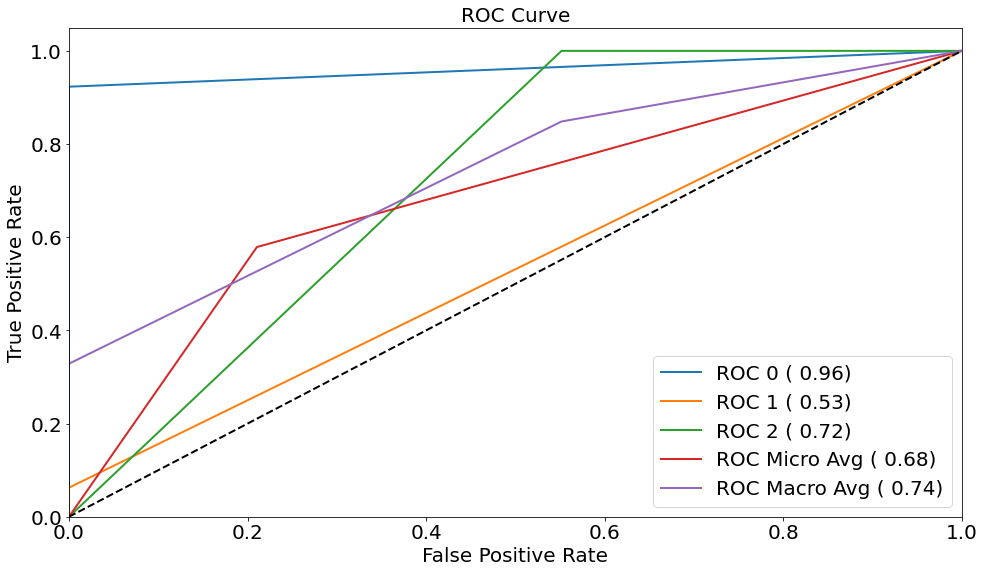

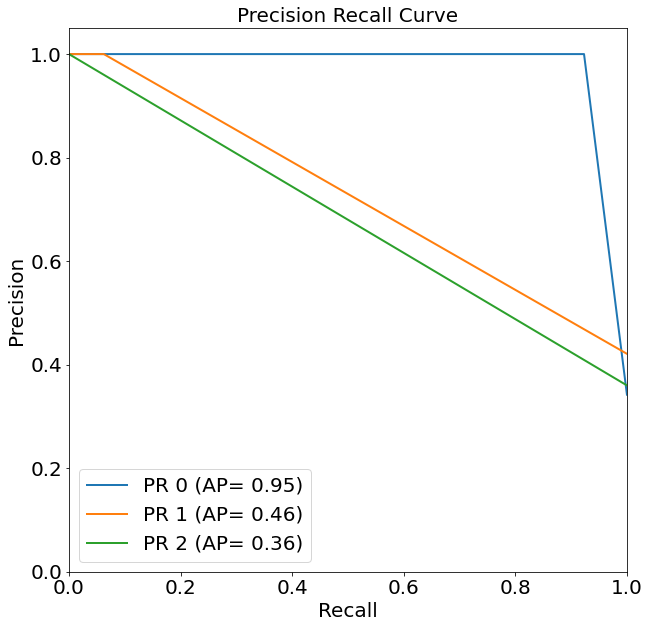

In [19]:
plotDecisionBoundary(X_test, y_test, bdtc, 'BDTC With Risk', risk = True);
plot3dProb(X_test, bdtc, '3D plot of BDTC With Risk');
results(f'BDTC With Risk', y_test, yPred, folder='');

### (8) Compare and analysis the performance between NB and RBDTC regarding to their decision boundary, precision, recall, and accuracy.

#### (8.1) default Naive Bayes

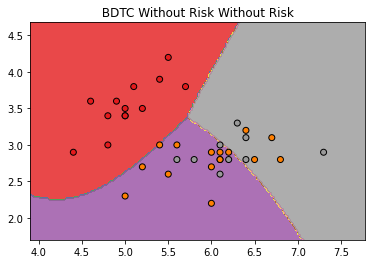

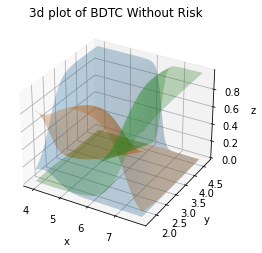

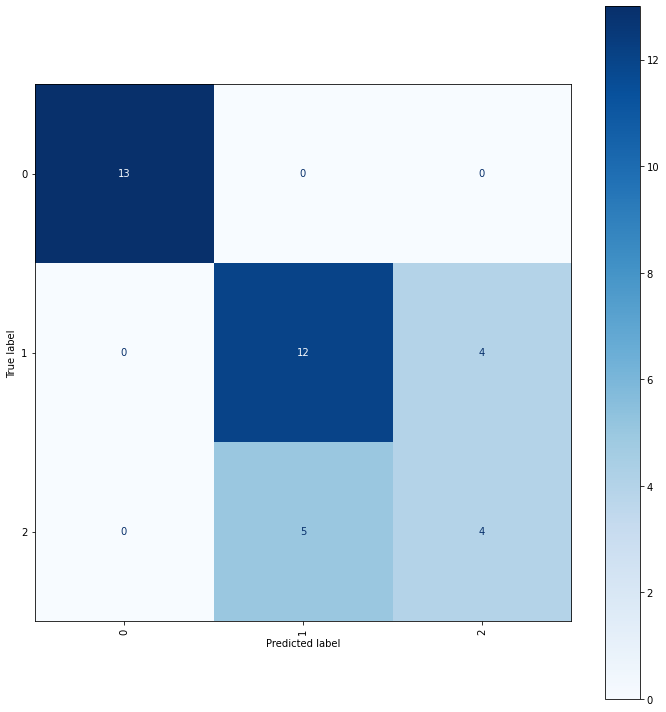

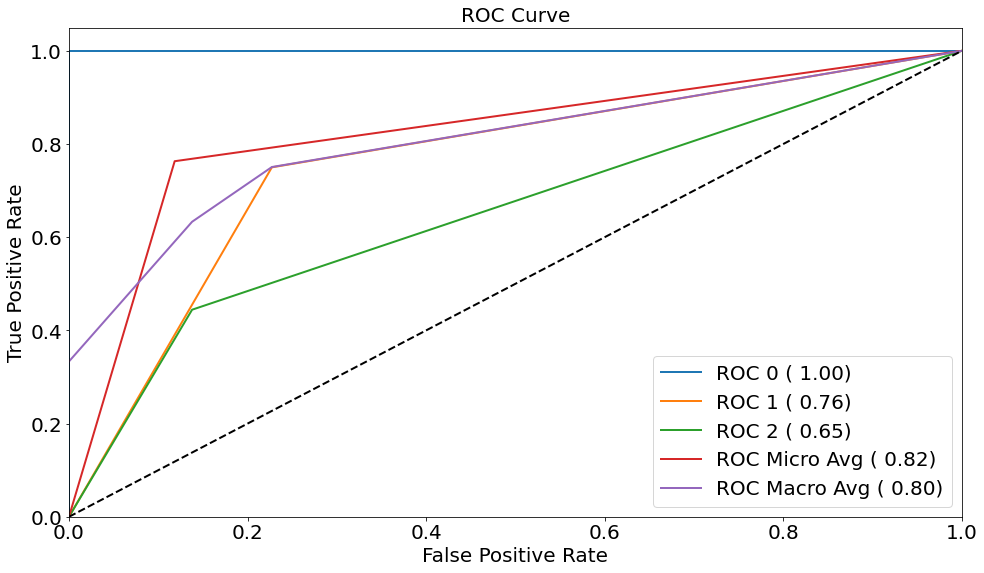

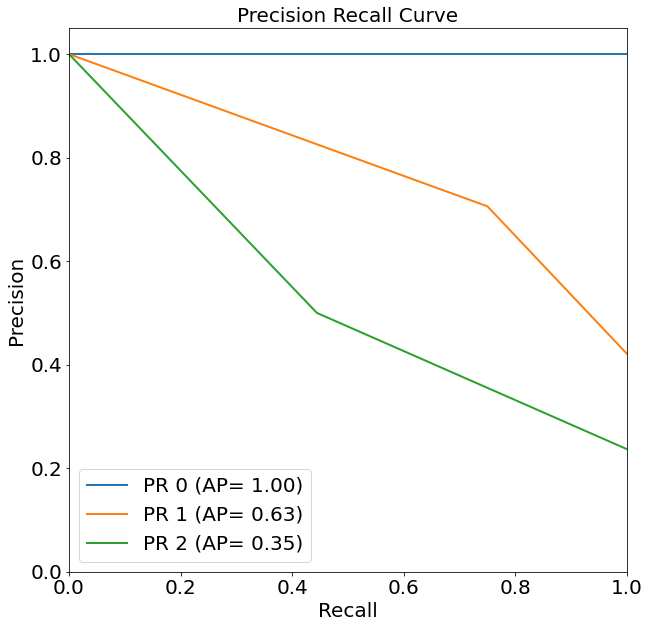

In [20]:
plotDecisionBoundary(X_test, y_test, NB_model, ' BDTC Without Risk Without Risk ' ,risk = False);
plot3dProb(X_test, NB_model, '3d plot of BDTC Without Risk');
results(f'BDTC Without Risk', y_test, y_predic_test, folder='');

#### (8.2) Risk-based Bayesian Decision Theory Classifier

test accuracy (with risk):  0.5789473684210527


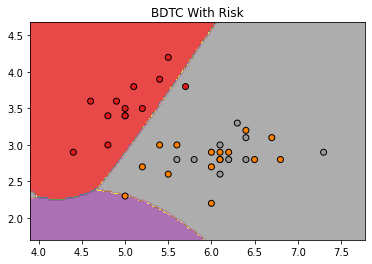

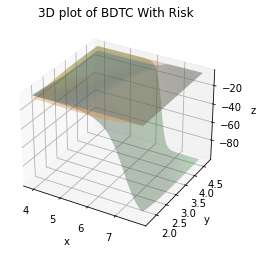

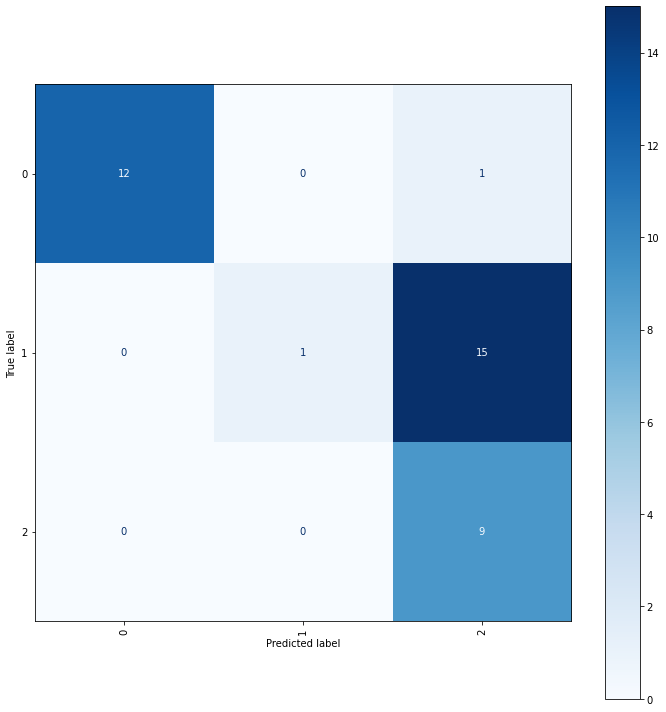

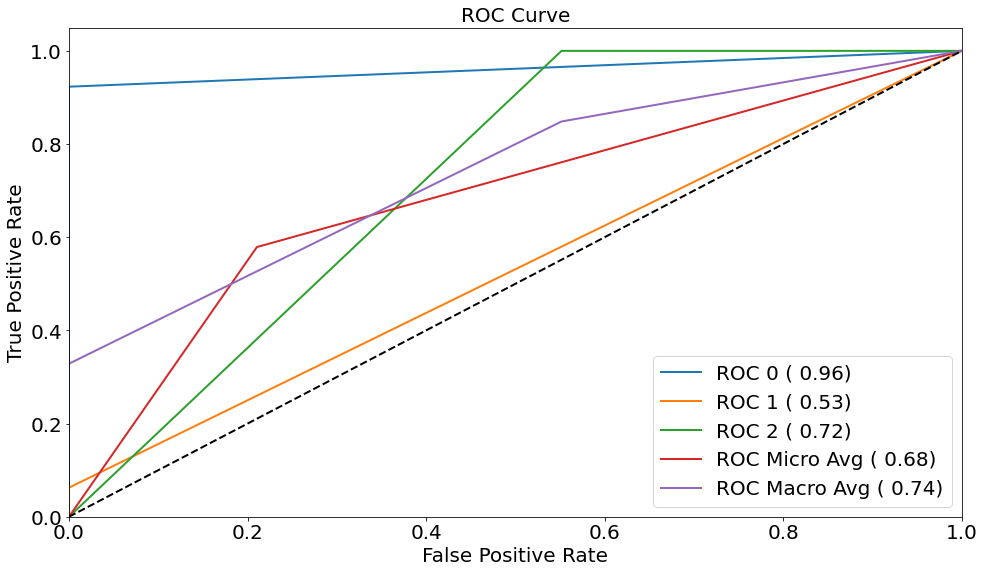

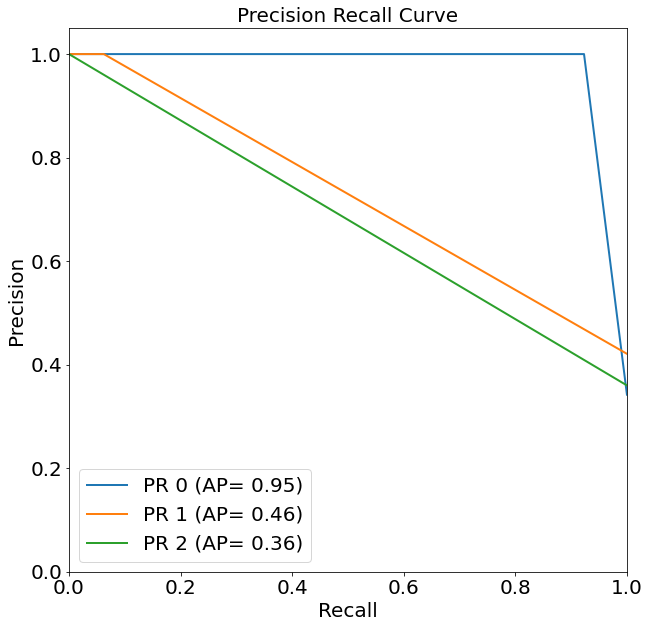

In [21]:
accuracy = accuracy_score(y_test , yPred )
print("test accuracy (with risk): " , accuracy)
plotDecisionBoundary(X_test, y_test, bdtc, 'BDTC With Risk' , risk = True);
plot3dProb(X_test, bdtc, '3D plot of BDTC With Risk');
results(f'BDTC With Risk', y_test, yPred, folder='');